In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from tensorflow import keras
from tensorflow.keras import layers
import time
import wandb
import julia
import os
from julia import DynamicalSystems
from julia import Base
from julia import Main
from julia import DifferentialEquations
from matplotlib import rc
from mpl_toolkits import mplot3d

%load_ext julia.magic

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Initializing Julia interpreter. This may take some time...


In [129]:
%julia X(x,y,z,t) =  1 + y*z
%julia Y(x,y,z,t) = -x*z
%julia Z(x,y,z,t) = y*y + 2*y*z

%julia function System!(du,u,p,t);     du[1] = X(u[1], u[2], u[3], t);    du[2] = Y(u[1], u[2], u[3], t);    du[3] = Z(u[1], u[2], u[3], t); end

%julia u0 = [-0.9, 0.5, 1.];

In [130]:
start_time = time.time()

%julia tspan = (0.0, 10000.)
%julia saveat = 0.005

%julia prob = DifferentialEquations.ODEProblem(System!, u0, tspan); sol = DifferentialEquations.solve(prob, DifferentialEquations.Vern7(), saveat=saveat)

u = Main.sol

print("running time : %s seconds" % (time.time() - start_time))
print(len(u[1]))

running time : 5.01892614364624 seconds
2000001


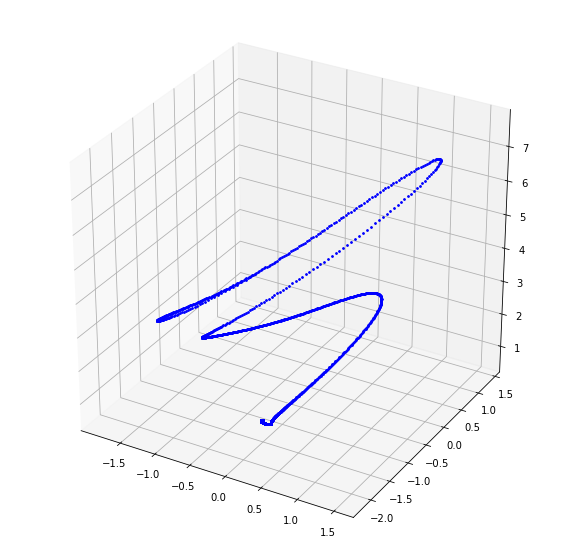

In [97]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ="3d")
for x,y,z in zip(u[0][-2000:], u[1][-2000:], u[2][-2000:]):
    ax.scatter(x, y, z, color = 'b', s=3)
plt.show()

In [134]:
os.remove("x_train.txt")

f = open("x_train.txt", "a")
a = 0
for i in u[0]:
    if a%100 == 0:
        f.write(str(i))
        f.write("\n")
    a=a+1
f.close()

In [135]:
os.remove("y_train.txt")

f = open("y_train.txt", "a")
a=0
for i in u[1]:
    if a%100 == 0:
        f.write(str(i))
        f.write("\n")
    a=a+1
f.close()

In [136]:
os.remove("z_train.txt")

f = open("z_train.txt", "a")
a=0
for i in u[2]:
    if a%100 == 0:
        f.write(str(i))
        f.write("\n")
    a=a+1
f.close()